<h1>Importation des packages et des fonctions</h1>

<p>Parmi les packages importés on retrouve :<br>
   <ul>
       <li>roadsimulator : tous les packages de ce simulateur</li>
       <li>matplotlib, numpy : visualisation et manipulation de données</li>

   </ul>

</p>

In [1]:
import sys
sys.path.append('../')

In [2]:
from roadsimulator.colors import Yellow, White, DarkShadow
from roadsimulator.layers.layers import Background, Crop, Perspective, DrawLines, Symmetric
from roadsimulator.layers.noise import Shadows, Filter, NoiseLines, Enhance
from roadsimulator.simulator import Simulator
import numpy as np
import matplotlib.pyplot as plt

<h1>Générateur de la data</h1>

In [24]:
width_begin, height_begin = 250, 200
width_end, height_end = 250, 90

xy0_range = [[x, height_begin] for x in range(0, width_begin+1)]  # add bottom edge of the picture
xy1_range = [[0, y] for y in range(int(height_begin/2), 0, -1)]  # add left edge of the picture
xy1_range += [[x, 0] for x in range(0, width_begin+1)]  # add top edge of the picture
xy1_range += [[width_begin-1, y] for y in range(0, int(height_begin/2))]  # add right edge of the picture
radius_range = list(range(200, 500)) + list(range(5000, 5300))
thickness_range = [6, 7, 8, 9, 10]

width_range = [i for i in range(width_end, 750)]
angle_max = 20

white_range = White()
yellow_range = Yellow()
shadow_colors = DarkShadow()

color_range = white_range

#Choisir les ground pics que l'on veut
background_layer = Background(n_backgrounds=4,
                                path='../ground_couloir/',
                                n_rot=1, n_res=1, n_crop=1,
                                input_size=(width_begin, height_begin),
                                width_range=width_range,
                                angle_max=angle_max)
lines_layer = DrawLines(xy0_range, xy1_range, radius_range,
                        thickness_range, color_range,
                        middle_line=(40, 20, 'dashed',white_range))
symmetry_layer = Symmetric(proba=0.5)
shadow_layer = Shadows(color=shadow_colors)
noisylines_layer = NoiseLines(color_range)
filter_layer = Filter()
enhance_layer = Enhance()
perspective_layer = Perspective()
crop_layer = Crop()

layers = [background_layer, lines_layer, symmetry_layer, shadow_layer,
            noisylines_layer, filter_layer, enhance_layer,
            perspective_layer, crop_layer]
simulator = Simulator(layers)

print(simulator.summary())

simulator.generate(n_examples=50, path='test')

 12%|█▏        | 6/50 [00:00<00:00, 58.84it/s]

Summary:
Number of layers: 9
Background	4	1	1	1
DrawLines
Symmetric	0.5
Shadows
NoiseLines
Filter
Enhance
Perspective
Crop
The path `test` already exists !
Deleting it...


100%|██████████| 50/50 [00:00<00:00, 62.12it/s]


<h1>Mettre la data sous la bonne forme et l'enregistré</h1>

In [25]:
#Mettre la data sous le bon format pour passer dans le modèle
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
X_simulator=[]
Y_simulator=[]
for root, subdirs, files in os.walk('test/'):
    for file in files:
        if os.path.splitext(file)[1].lower() in ('.jpg', '.jpeg'):
             path=os.path.join(root, file)
             split=path.split('_')
             image = img.imread(path)
             X_simulator+=[image]
             Y_simulator+=[float(split[-1][:-4])]
   
x=Y_simulator
normalized = [(x[i]-min(x))/(max(x)-min(x)) for i in range(len(x))]
normalized= (1-np.array(normalized))*180                

In [26]:
normalized.shape

(50,)

<h1>Save la data sous la bonne forme</h1>
<p> Il ne reste qu'à envoyer la data dans l'algo de training
Vous pouvez changer le path pour directement enregistrer la donnée dans Datasets ../../Datasets/Regression/</p>

In [7]:
 np.save('X_simulator', X_simulator)

In [8]:
 np.save('Y_simulator', normalized)

<h1>Visualisation de la data simulée</h1>


-0.0007472943455529869
98.30935985009936


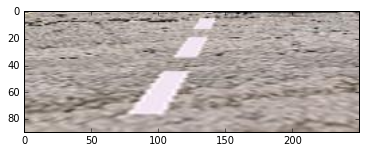

-1.4482854001477963
166.9662626868713


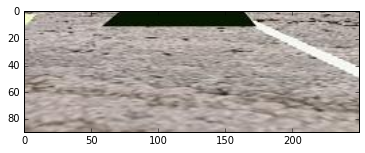

-1.1274404243749663
151.7485476996079


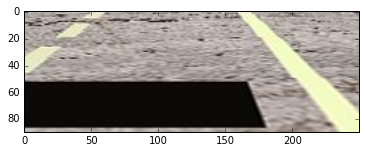

1.2193358511521675
40.44067256825727


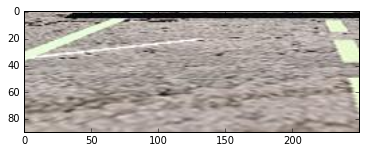

-0.7010230488256673
131.52352135753858


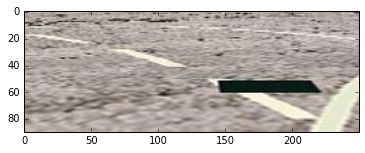

In [27]:
for i in range(1,len(X_simulator),10):
    print((Y_simulator[i]))
    print(normalized[i])
    plt.figure()
    plt.imshow(X_simulator[i])
    plt.show()